## **Proyecto:  Análisis y Visualización de Datos**

### **Integrantes:**
- Filian, Karla
- Villamar, Karla

#### Introducción

El agua es uno de los recursos naturales más vulnerables y explotados en nuestro planeta. Una de las principales metas de los objetivos de desarrollo sostenible (ODS) es proporcionar agua potable a las poblaciones de todo el mundo. Por este motivo, se enfatiza la importancia de garantizar la disponibilidad y la gestión sostenible de las fuentes de agua (PNUD, 2023). Sin embargo, las fuentes de abastecimiento de agua, especialmente en países en vías de desarrollo, estan contaminadas, caracterizándose principalmente por el cambio en sus propiedades físicas, químicas, biológicas, bacteriológicas y radiológicas (WHO, 2017). Se conoce ampliamente que la fuente de solutos puede proceder de fuentes naturales (como la disolución de rocas, erosión de suelo) y fuentes antropogénicas (como actividades agrícolas, industriales y domésticas) (Liu & Han, 2020).

Las aguas superficiales benefician a las civilizaciones debido a que tienen un valor estético y paisajístico, reducen el impacto climático y proporcionan recursos. Por lo tanto, es necesario desarrollar enfoques actualizados e integrales de programas de monitorio que sean fáciles de entender y difundir (Bushero et al., 2022).

#### Objetivo: 

Realizar un análisis de un conjunto de datos enfocado en geociencias, utilizando las librerías de Python numpy, pandas, matplotlib, seaborn, entre otras, para identificar tendencias y observaciones importantes de los datos.

#### Descripción de los datos

Para el desarrollo de este proyecto se obtuvo un registro de 10 puntos de muestreo a lo largo de un río, donde se obtuvieron valores de pH, dureza, solidos disueltos totales, cloraminas, sulfatos, conductividad, trihalomnetanos y turbidez desde el año 1996 hasta 2023.
Se manejó un total de 3270 registros con los cuales se pretende clasificar el agua segun su dureza y para el tipo de uso que se le puede dar. Además, se comparará las concentraciones del conjunto de datos con el TULSMA com los criterios de calidad de agua para riego agrícola.

#### Metodología empleada

##### Preparación del Entorno de Trabajo:
- Crear un repositorio en GitHub que almacene los datos, notebook del proyecto, y demás información relevante.
- Generar un nuevo ambiente virtual para el desarrollo del proyecto, instalando las librerías necesarias

###### Carga y Preprocesamiento de los Datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)  
import plotly.express as px 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

###### Cargar el conjunto de datos utilizando pandas o la librería más adecuada para el tipo de archivo que será importado.

In [2]:
cd = pd.read_excel("water_potability.xlsx")
cd

,Punto,Year,Mes,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,P1,1996,Abril,NaN,204.890455,547.000000,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,P2,1996,Abril,3.716080,129.422921,593.000000,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,P3,1996,Abril,8.099124,224.236259,502.000000,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,P4,1996,Abril,8.316766,214.373394,533.000000,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,P5,1996,Abril,9.092223,181.101509,543.000000,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,P6,2023,Junio,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,0
3266,P7,2023,Junio,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,0
3267,P8,2023,Junio,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,0
3268,P9,2023,Junio,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,0


###### Realizar limpieza inicial de datos: Corregir tipos de datos, modificar nombres de columnas, etc.

In [3]:
cd.drop(["Potability"], axis=1, inplace=True)

In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Punto            3270 non-null   object 
 1   Year             3270 non-null   int64  
 2   Mes              3270 non-null   object 
 3   ph               2779 non-null   float64
 4   Hardness         3270 non-null   float64
 5   Solids           3270 non-null   float64
 6   Chloramines      3270 non-null   float64
 7   Sulfate          2493 non-null   float64
 8   Conductivity     3270 non-null   float64
 9   Organic_carbon   3270 non-null   float64
 10  Trihalomethanes  3109 non-null   float64
 11  Turbidity        3270 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 306.7+ KB


Nota: Con el método info comprobamos el tipo de datos dentro de cada columna, los cuales no necesitan corrección.

In [5]:
# Modificar nombres de las columnas

In [6]:
cd.rename(columns={"ph":"pH","Solids":"TDS", "Mes":"Month", "Punto":"Sample Point"}, inplace=True)

In [7]:
cd

,Sample Point,Year,Month,pH,Hardness,TDS,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,P1,1996,Abril,NaN,204.890455,547.000000,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,P2,1996,Abril,3.716080,129.422921,593.000000,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,P3,1996,Abril,8.099124,224.236259,502.000000,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,P4,1996,Abril,8.316766,214.373394,533.000000,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,P5,1996,Abril,9.092223,181.101509,543.000000,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...,...,...,...
3265,P6,2023,Junio,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833
3266,P7,2023,Junio,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358
3267,P8,2023,Junio,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,P9,2023,Junio,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983


#####  Análisis Exploratorio de Datos (EDA)

###### Realizar un análisis exploratorio de los datos, como describir estadísticas básicas, visualizar la distribución de las variables y detectar posibles outliers.

In [8]:
cd.shape

(3270, 12)

In [9]:
cd.size

39240

In [10]:
cd.Month.value_counts()

Month
Abril         280
Mayo          280
Junio         280
Julio         270
Agosto        270
Septiembre    270
Octubre       270
Noviembre     270
Diciembre     270
Enero         270
Febrero       270
Marzo         270
Name: count, dtype: int64

In [11]:
#Resumen estadistico de las variables numericas
cd.iloc[:,3:].describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
pH,2779.0,7.081340,1.594089,0.000000,6.095820,7.036752,8.062436,14.000000
Hardness,3270.0,196.370369,32.901984,47.432000,176.844221,197.039446,216.671731,323.124000
TDS,3270.0,12052.082928,14037.159710,320.942611,900.250000,2914.000000,22717.107469,61227.196008
Chloramines,3270.0,7.121847,1.584330,0.352000,6.125756,7.128299,8.115665,13.127000
Sulfate,2493.0,333.760495,41.429448,129.000000,307.694522,333.073364,359.951766,481.030642
Conductivity,3270.0,426.223484,80.857317,181.483754,365.724999,421.926811,481.833045,753.342620
Organic_carbon,3270.0,14.285428,3.308409,2.200000,12.066018,14.219418,16.558601,28.300000
Trihalomethanes,3109.0,66.389487,16.184812,0.738000,55.816510,66.612984,77.330137,124.000000
Turbidity,3270.0,3.967575,0.780036,1.450000,3.440413,3.955122,4.500544,6.739000


In [12]:
#Resumen estadistico de las variables categoricas
cd.describe(include="object")

,Sample Point,Month
count,3270,3270
unique,10,12
top,P1,Abril
freq,327,280


In [13]:
#Validacion de datos numericos
cd.select_dtypes("number")

,Year,pH,Hardness,TDS,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,1996,NaN,204.890455,547.000000,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,1996,3.716080,129.422921,593.000000,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,1996,8.099124,224.236259,502.000000,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,1996,8.316766,214.373394,533.000000,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,1996,9.092223,181.101509,543.000000,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...,...
3265,2023,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833
3266,2023,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358
3267,2023,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,2023,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983


###### Agrupacion de datos por puntos de muestreo

In [14]:
cd.groupby(["Sample Point","Month","Year"])[["pH","Hardness","TDS","Chloramines"]].max()

pH    Hardness           TDS  Chloramines
Sample Point Month      Year                                                 
P1           Abril      1996       NaN  204.890455    547.000000     7.300212
                        1997  6.877457  136.879214    849.000000     7.091522
                        1998  9.380658  265.061216    620.000000     4.271545
                        1999  5.374223  201.331440    759.000000     3.239580
                        2000  7.865095  210.039294    985.000000     6.612900
...                                ...         ...           ...          ...
P9           Septiembre 2018  4.858056  159.695554  32886.528899     7.689305
                        2019  8.922380  278.619448  21963.476003     8.105638
                        2020  6.392760  216.675543  19323.677250     5.906405
                        2021  8.108351  202.510194  26730.192613     8.395129
                        2022  5.456681  219.519886  20967.840610     6.826782

[3270 rows x 4 columns]

###### Identificacion de pH maximo mensual

In [15]:
pHmax = cd.groupby("Month")["pH"].max().reset_index()
pHmax

,Month,pH
0,Abril,11.907740
1,Agosto,11.563169
2,Diciembre,11.267828
3,Enero,10.933111
4,Febrero,13.541240
5,Julio,14.000000
6,Junio,13.175402
7,Marzo,10.947473
8,Mayo,13.349889
9,Noviembre,11.390543


In [16]:
pHmin = cd.groupby(["Year", "Month"])["pH"].min().reset_index()
# Encontrar el año correspondiente al pH minimo por mes
pHmin_year = pHmin.loc[pHmin.groupby("Month")["pH"].idxmin()].reset_index()
pHmin_year

,index,Year,Month,pH
0,69,2002,Abril,0.227499
1,286,2020,Agosto,0.975578
2,2,1996,Diciembre,1.844538
3,84,2003,Enero,0.989912
4,13,1997,Febrero,2.612036
5,122,2006,Julio,2.690831
6,219,2014,Junio,2.558103
7,40,1999,Marzo,2.798549
8,305,2021,Mayo,0.000000
9,246,2016,Noviembre,2.945469


In [17]:
pHmax = cd.groupby(["Year", "Month"])["pH"].max().reset_index()
# Encontrar el año correspondiente al pH máximo por mes
pHmax_year = pHmax.loc[pHmax.groupby("Month")["pH"].idxmax()].reset_index()
pHmax_year

,index,Year,Month,pH
0,261,2018,Abril,11.907740
1,286,2020,Agosto,11.563169
2,11,1997,Diciembre,11.267828
3,300,2021,Enero,10.933111
4,289,2020,Febrero,13.541240
5,206,2013,Julio,14.000000
6,27,1998,Junio,13.175402
7,292,2020,Marzo,10.947473
8,293,2020,Mayo,13.349889
9,306,2021,Noviembre,11.390543


##### Definir función para clasificación de agua por su posible uso

In [18]:
def clasificar_uso_agua(cd):
    # Definir límites
    limites = {"Agua Potable": {"dureza": 180,"conductividad": 500,"TDS": 500}, "Agua Industrial": {"dureza": 120,"conductividad": 2000,"TDS": 1500},
        "Agua Agrícola": {"dureza": 180,"conductividad": 3000,"TDS": 2000},"Agua Recreacional": {"dureza": 120,"conductividad": 1000,"TDS": 1000}}
    clasificaciones = []
    
    for i, row in cd.iterrows():
        dureza = row["Hardness"]
        conductividad = row["Conductivity"]
        TDS = row["TDS"]
        
        clasificacion = []
        
        if dureza <= limites["Agua Potable"]["dureza"] and conductividad <= limites["Agua Potable"]["conductividad"] and TDS <= limites["Agua Potable"]["TDS"]:
            clasificacion.append("Agua Potable")
        elif dureza <= limites["Agua Industrial"]["dureza"] and conductividad <= limites["Agua Industrial"]["conductividad"] and TDS <= limites["Agua Industrial"]["TDS"]:
            clasificacion.append("Agua Industrial")
        elif dureza <= limites["Agua Agrícola"]["dureza"] and conductividad <= limites["Agua Agrícola"]["conductividad"] and TDS <= limites["Agua Agrícola"]["TDS"]:
            clasificacion.append("Agua Agrícola")
        elif dureza <= limites["Agua Recreacional"]["dureza"] and conductividad <= limites["Agua Recreacional"]["conductividad"] and TDS <= limites["Agua Recreacional"]["TDS"]:
            clasificacion.append("Agua Recreacional")
        
        clasificaciones.append(", ".join(clasificacion) if clasificacion else "No Clasificable")
    
    cd["Usodeagua"] = clasificaciones
    return cd

cd_clasificado = clasificar_uso_agua(cd)
cd_clasificado

,Sample Point,Year,Month,pH,Hardness,TDS,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Usodeagua
0,P1,1996,Abril,NaN,204.890455,547.000000,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,No Clasificable
1,P2,1996,Abril,3.716080,129.422921,593.000000,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,Agua Agrícola
2,P3,1996,Abril,8.099124,224.236259,502.000000,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,No Clasificable
3,P4,1996,Abril,8.316766,214.373394,533.000000,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,No Clasificable
4,P5,1996,Abril,9.092223,181.101509,543.000000,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,No Clasificable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,P6,2023,Junio,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,No Clasificable
3266,P7,2023,Junio,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,No Clasificable
3267,P8,2023,Junio,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,No Clasificable
3268,P9,2023,Junio,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,No Clasificable


In [19]:
cd_clasificado.Usodeagua.value_counts()

Usodeagua
No Clasificable    2856
Agua Agrícola       381
Agua Industrial      17
Agua Potable         16
Name: count, dtype: int64

In [20]:
def clasificar_dureza(valor):
    if pd.isna(valor):
        return "Desconocido"
    if valor<60:
        return "Agua blanda"
    if valor<=120:
        return "Agua moderadamente dura"
    if  valor<=180:
        return "Agua dura"
    else:
        return "Agua muy dura"
cd_clasificado["Clasificacion_de_dureza"]=cd_clasificado["Hardness"].apply(clasificar_dureza)
cd

,Sample Point,Year,Month,pH,Hardness,TDS,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Usodeagua,Clasificacion_de_dureza
0,P1,1996,Abril,NaN,204.890455,547.000000,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,No Clasificable,Agua muy dura
1,P2,1996,Abril,3.716080,129.422921,593.000000,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,Agua Agrícola,Agua dura
2,P3,1996,Abril,8.099124,224.236259,502.000000,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,No Clasificable,Agua muy dura
3,P4,1996,Abril,8.316766,214.373394,533.000000,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,No Clasificable,Agua muy dura
4,P5,1996,Abril,9.092223,181.101509,543.000000,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,No Clasificable,Agua muy dura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,P6,2023,Junio,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,No Clasificable,Agua muy dura
3266,P7,2023,Junio,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,No Clasificable,Agua dura
3267,P8,2023,Junio,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,No Clasificable,Agua muy dura
3268,P9,2023,Junio,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,No Clasificable,Agua muy dura


In [21]:
cd_clasificado.Clasificacion_de_dureza.value_counts()

Clasificacion_de_dureza
Agua muy dura              2336
Agua dura                   882
Agua moderadamente dura      51
Agua blanda                   1
Name: count, dtype: int64

###### Crear funcion para automatizar algunas de las tareas repetitivas del EDA.

In [22]:
def calcular_estadisticas(dtf):
    estadisticas = {}
    for columna in dtf.select_dtypes(include='number').columns:
        if columna!="Year":
            media = cd[columna].mean()
            mediana = cd[columna].median()
            desviacion_estandar = cd[columna].std()
        
            estadisticas[columna] = {'Media': media, 'Mediana': mediana,'Desviacion_estandar': desviacion_estandar}
    return pd.DataFrame(estadisticas)

calcular_estadisticas(cd_clasificado)

,pH,Hardness,TDS,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Media,7.081340,196.370369,12052.082928,7.121847,333.760495,426.223484,14.285428,66.389487,3.967575
Mediana,7.036752,197.039446,2914.000000,7.128299,333.073364,421.926811,14.219418,66.612984,3.955122
Desviacion_estandar,1.594089,32.901984,14037.159710,1.584330,41.429448,80.857317,3.308409,16.184812,0.780036


In [23]:
cd_clasificado.groupby(["Usodeagua"])[["pH","Hardness","TDS"]].mean()


,pH,Hardness,TDS
Usodeagua,,,
Agua Agrícola,6.880578,162.936682,948.818244
Agua Industrial,8.517901,100.789411,724.470588
Agua Potable,7.690764,142.912982,459.312500
No Clasificable,7.096689,201.698951,13665.667515


#### Visualización de Datos

###### Distribución numérica de cada variable

In [24]:
def gen_distribucion(cd_clasificado):
    variables=["pH","Hardness","TDS","Conductivity",
               "Sulfate","Turbidity", "Chloramines"]
    for i in variables:
        fig, ax = plt.subplots(figsize=(12, 8))
        sns.histplot(data=cd_clasificado, 
                     x=cd_clasificado[i], kde=True)  
        ax.set_xlabel(i)
        ax.set_title(f'Distribución de {i}')
        
    return

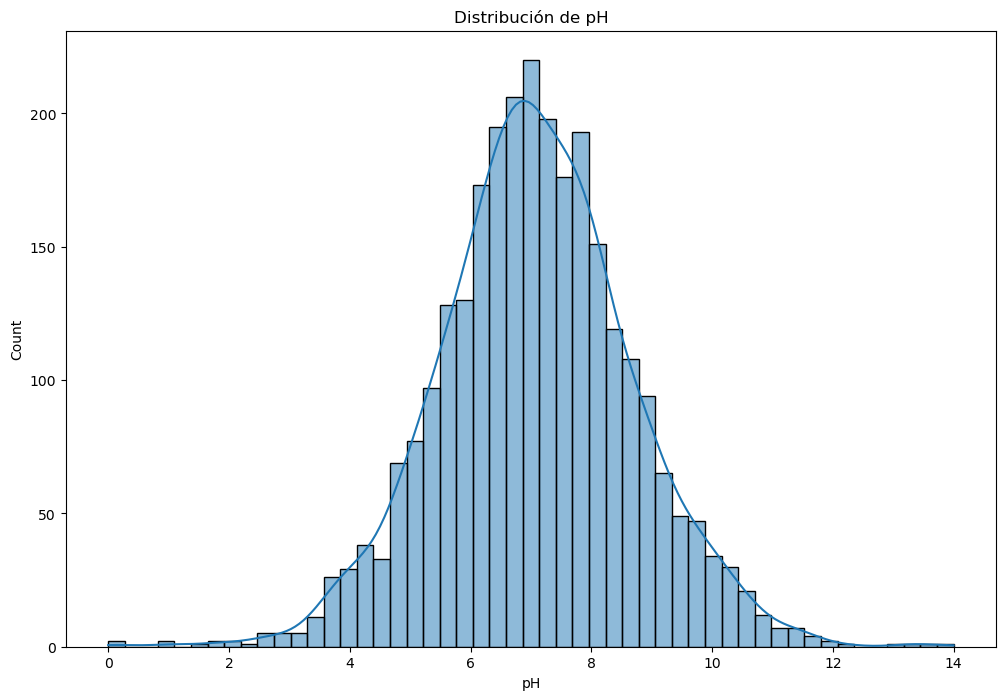

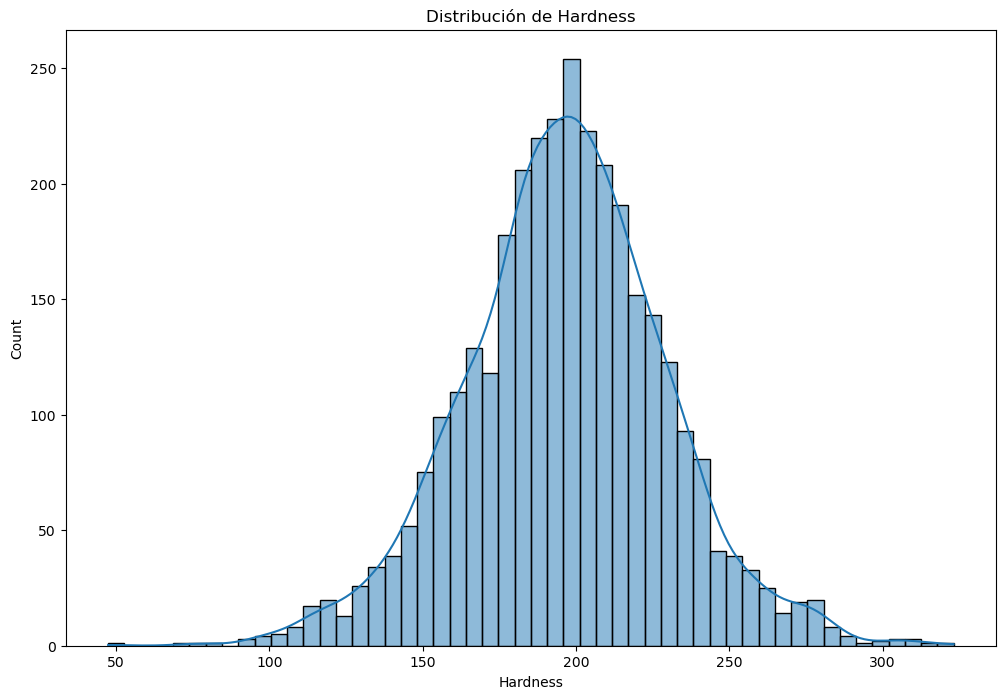

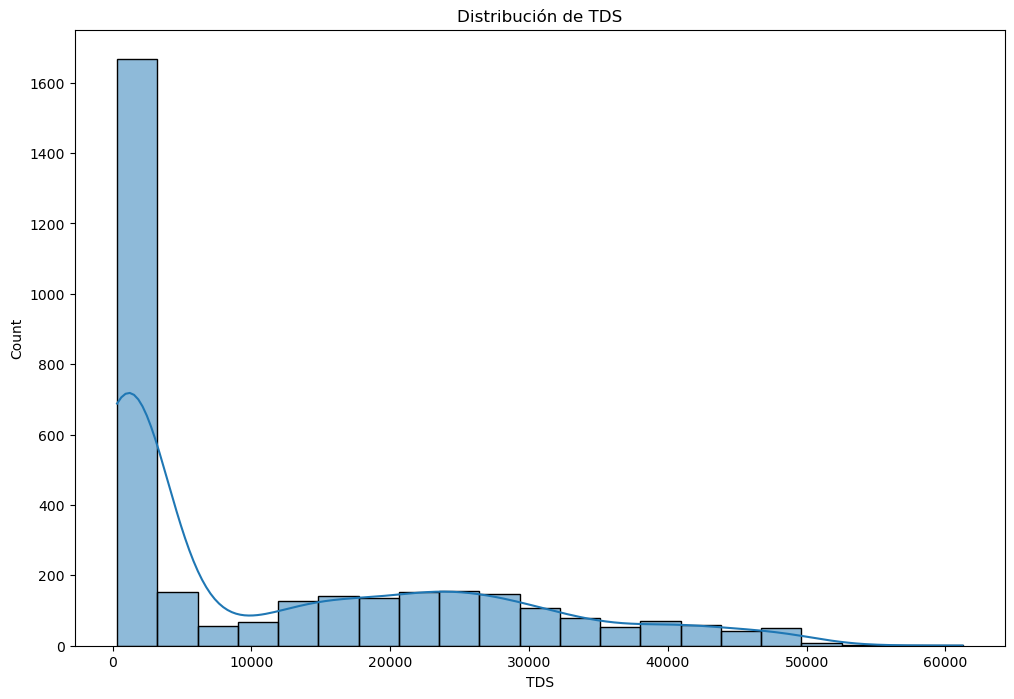

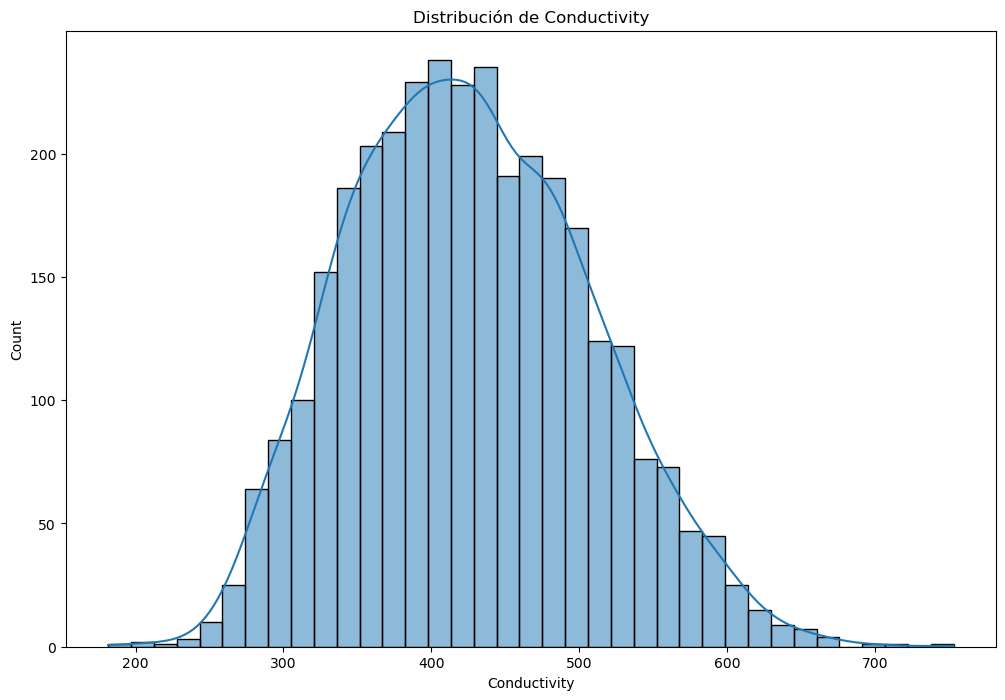

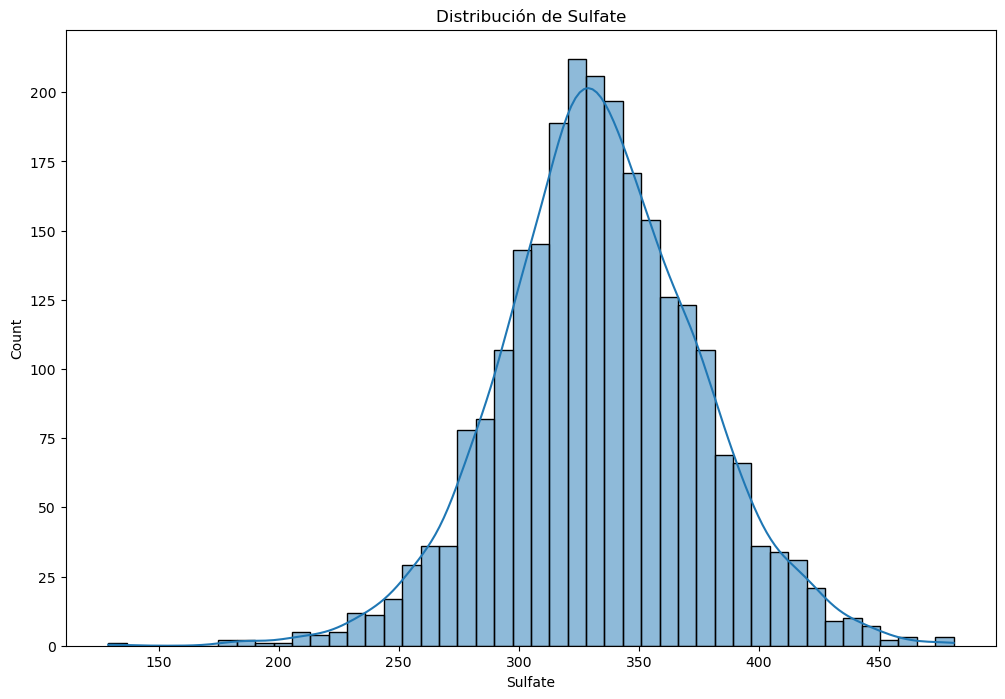

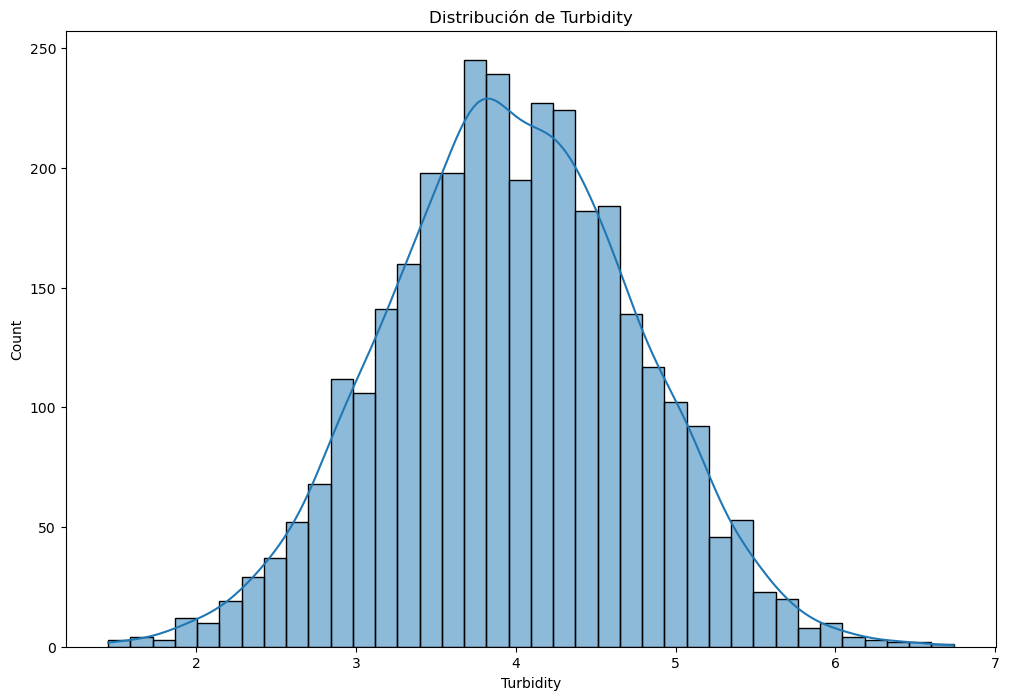

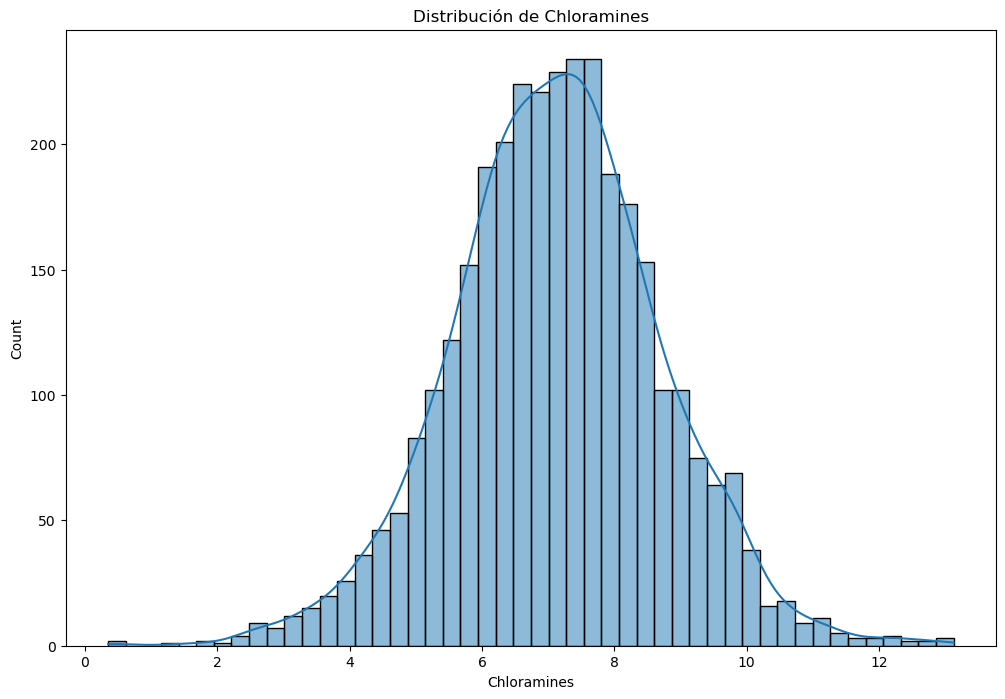

In [25]:
gen_distribucion(cd_clasificado)

###### Comportamiento de variables categóricas

In [26]:
def gen_variables_categorica(cd_clasificado):
    variables=["Usodeagua","Clasificacion_de_dureza"]        
    for i in variables:
        fig, ax = plt.subplots(figsize=(12, 8))
        sns.countplot(data=cd, x=i)  
        ax.set_title(f' Gráfico de Barras de {i}')
        plt.show()
    return

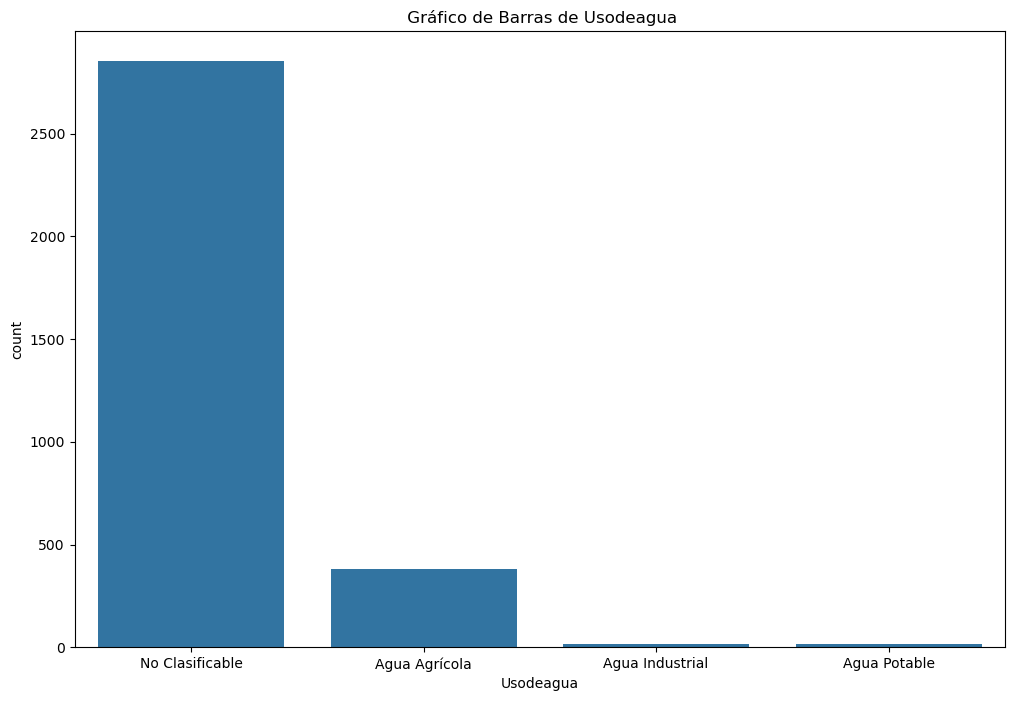

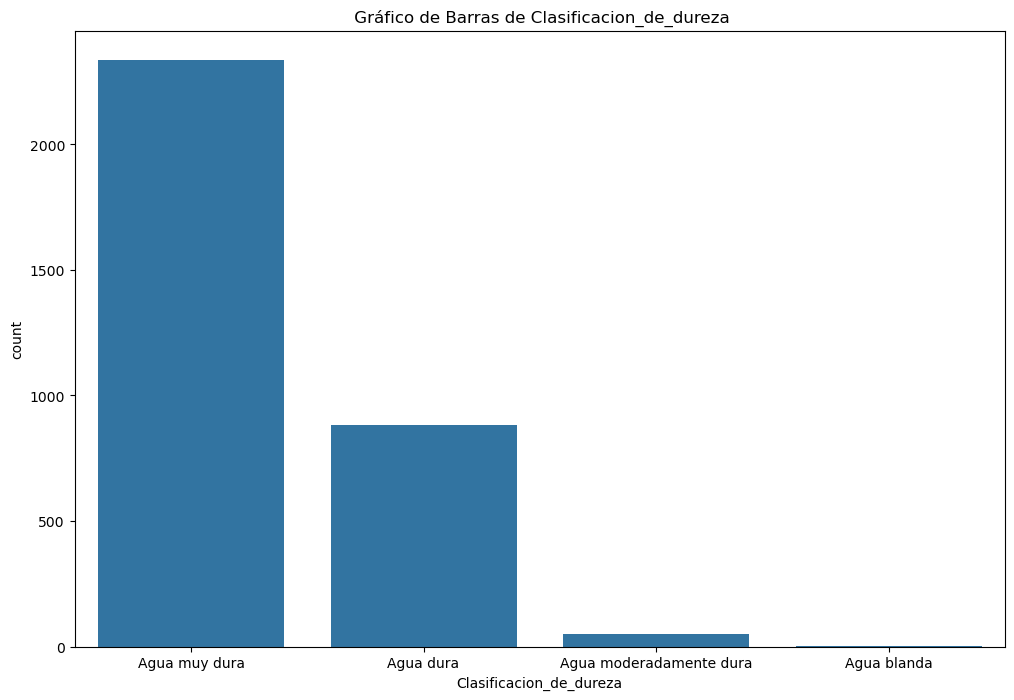

In [27]:
gen_variables_categorica(cd_clasificado)

###### Tendencias de alguna variable a lo largo del tiempo (gráficos de líneas)

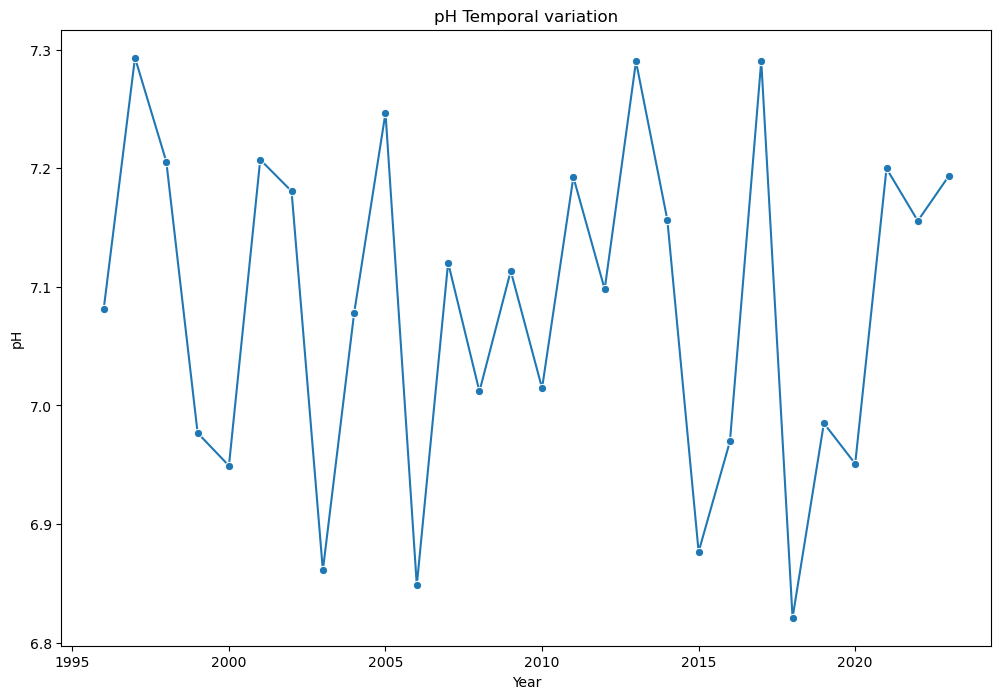

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=cd, x="Year", y="pH", marker='o', ci=None)     
ax.set_ylabel("pH")
ax.set_title("pH Temporal variation")
plt.show()

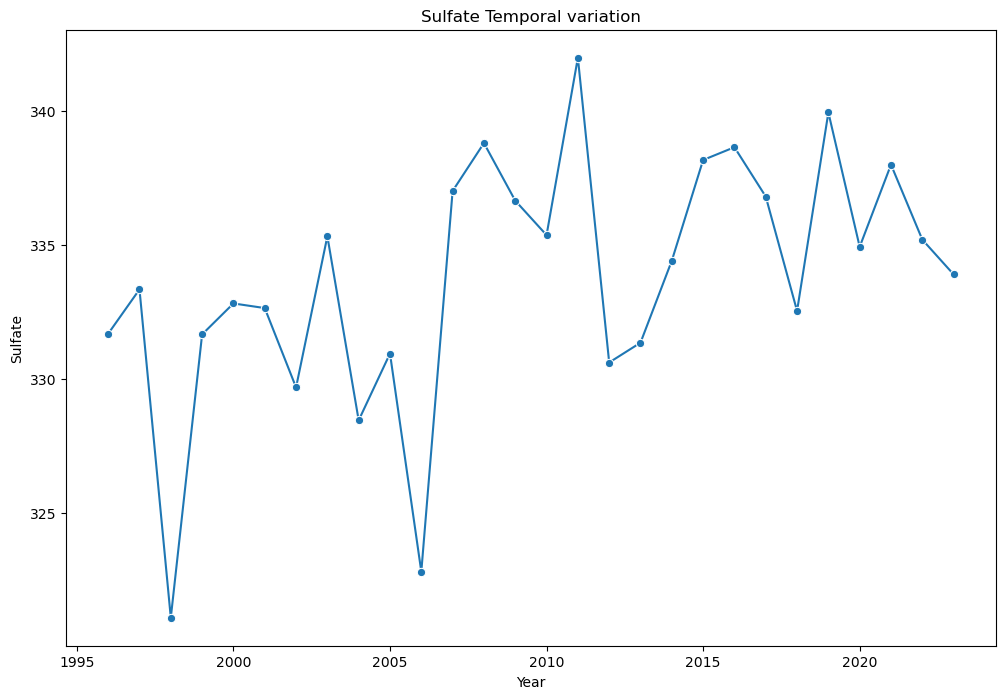

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=cd, x="Year", y="Sulfate", marker='o', ci=None)     
ax.set_title("Sulfate Temporal variation")
plt.show()

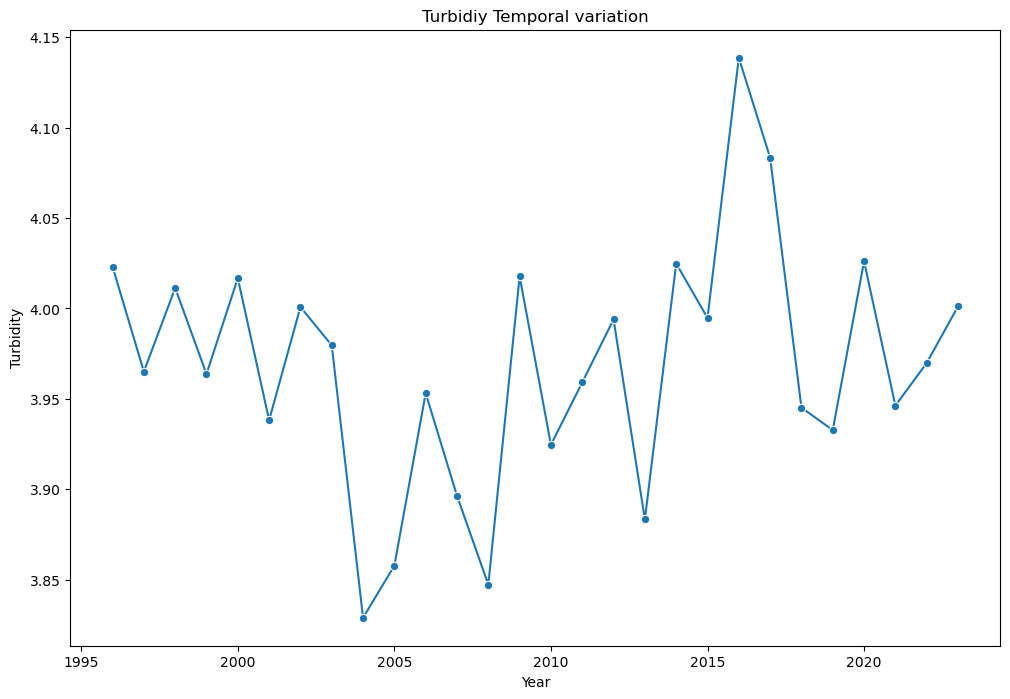

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=cd, x="Year", y="Turbidity", marker='o', ci=None)     
ax.set_title("Turbidiy Temporal variation")
plt.show()

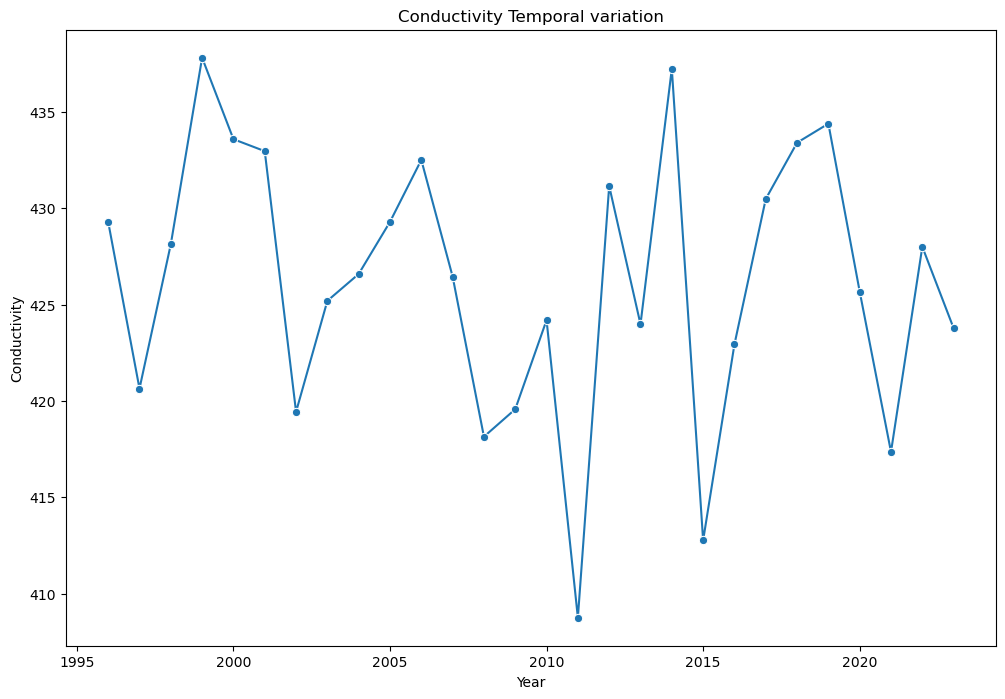

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=cd, x="Year", y="Conductivity", marker='o', ci=None)     
ax.set_title("Conductivity Temporal variation")
plt.show()

###### Mapa de calor para visualizar variaciones de variables de interes 

In [32]:
# Mapas de calor de las variables numericas
a=cd_clasificado.iloc[:,2:]

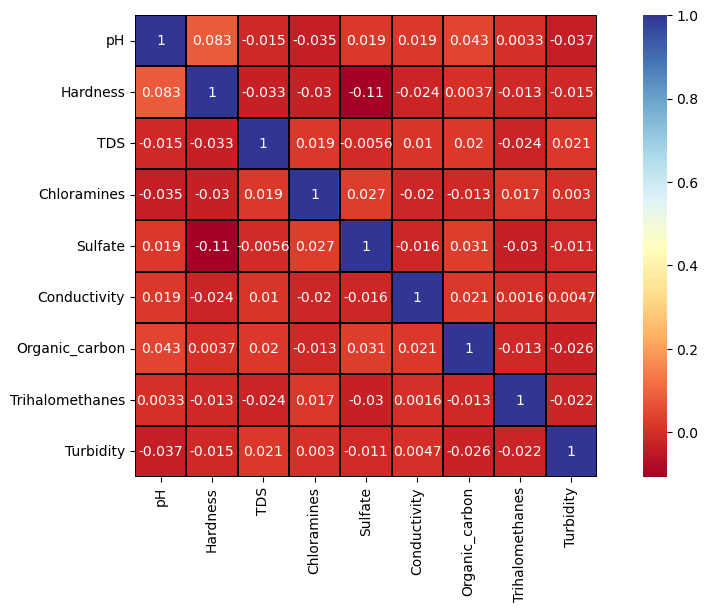

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))
# Pearson correlation
cor = a.corr(numeric_only=True)

sns.heatmap(cor, cmap='RdYlBu', annot=True, 
            linewidths=0.01, linecolor='black', 
            square=True, ax=ax)
plt.show()

###### Gráfico de Cajas y Bigotes

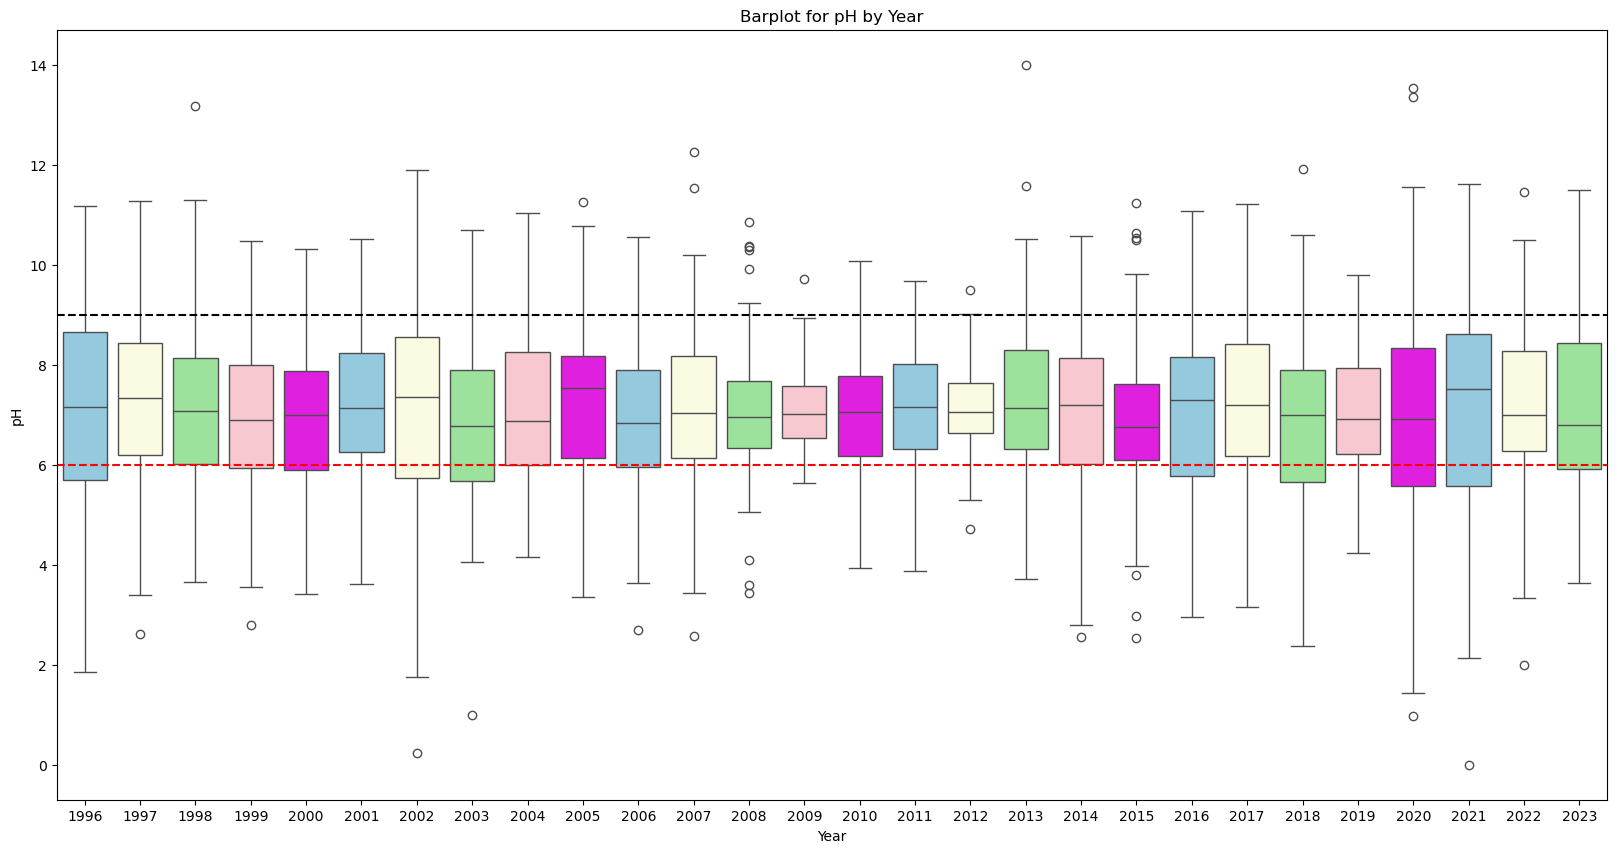

In [34]:
#Define scheme
fig, ax = plt.subplots(figsize=(20,10))

#Create plot with seaborn
sns.boxplot(data=cd_clasificado, x="Year", y="pH", palette=["skyblue","lightyellow","lightgreen","pink","magenta"])

#Set labels and title
ax.set_title("Barplot for pH by Year")
ymin=ax.axhline(y=6, c="red", ls="--")
ymax=ax.axhline(y=9, c="black", ls="--")

plt.show()

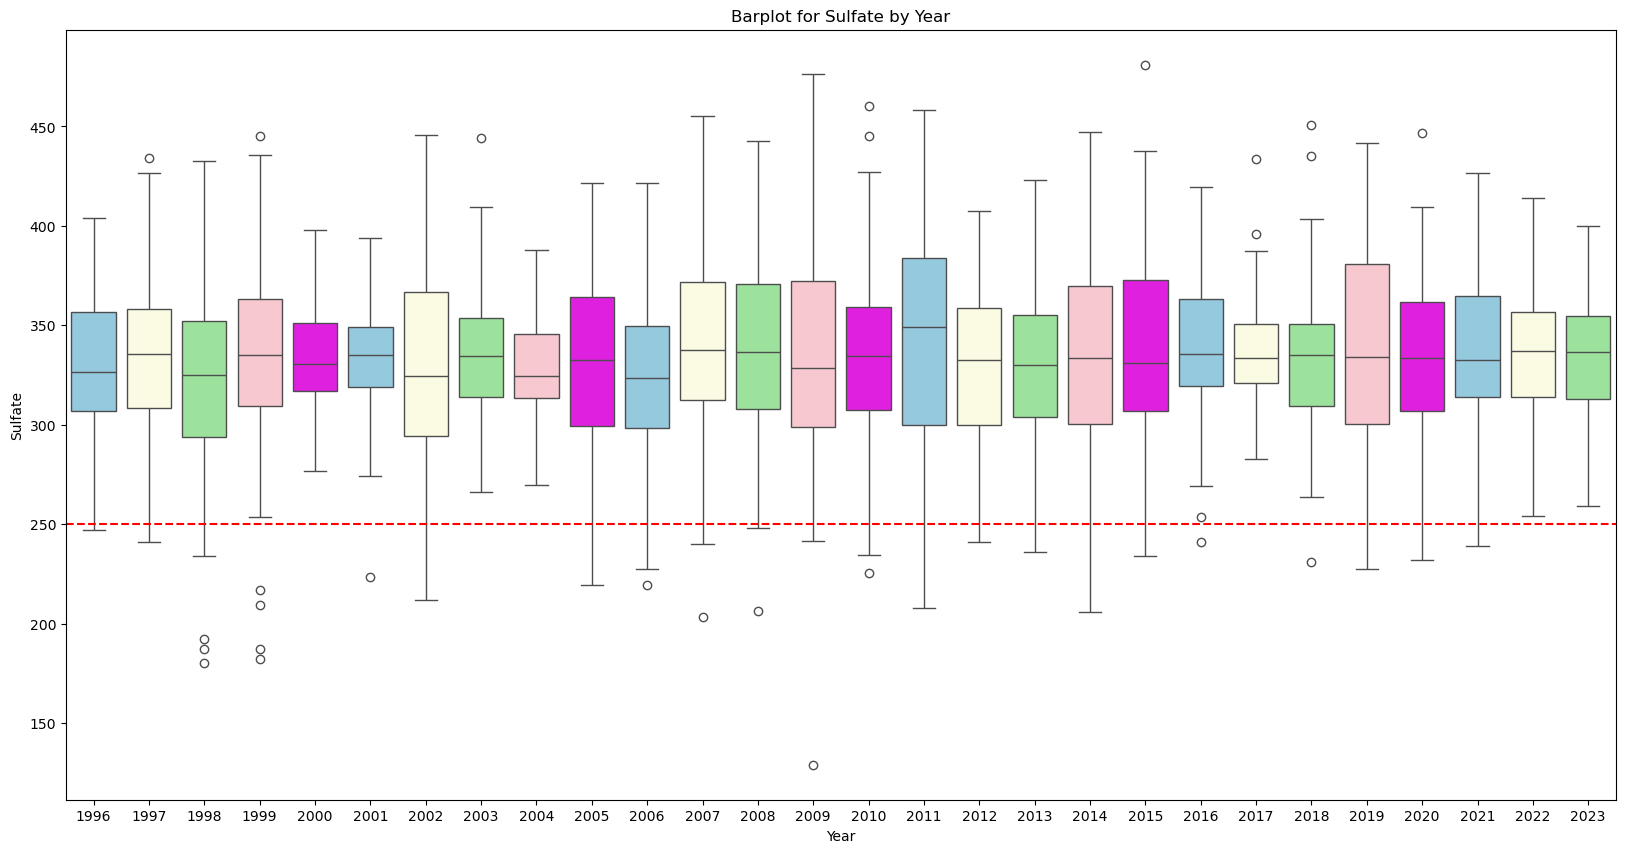

In [35]:
#Define scheme
fig, ax = plt.subplots(figsize=(20,10))

#Create plot with seaborn
sns.boxplot(data=cd_clasificado, x="Year", y="Sulfate", palette=["skyblue","lightyellow","lightgreen","pink","magenta"])

#Set labels and title
ax.set_title("Barplot for Sulfate by Year")
ax.axhline(y=250, c="red", ls="--")

plt.show()

#### Resultados

- Luego de la clasificación del uso de agua, considerando la dureza, conductividad y TDS, se obtuvo que 2856 registros no son clasificables, 381 sirven para uso agrícola, 17 para usos industriales y 16 como agua potable.
- Al realizar la clasificación del agua según su dureza, se obtuvo que 2336 muestras corresponden a agua muy dura, 882 se clasifica como dura, 51 como moderadamente dura y solo 1 registro como agua blanda.
- Se realizó la distribución de los datos de las variables numérica, de las cuales todos los datos tienen una distribución normal, a excepción de los TDS que presenta asimetria.
- La mayoría de los rangos de pH se encuentran entre los valores permisibles para uso de agua para uso agrícola.
- La relación entre las variables se determinó mediante el mapa de calor, donde se determinó que no existe una correlación entre ellas. 
- En el boxplot podemos observar los valores atipicos y los cuartiles tanto del pH como de sulfatos entre 1996 y 2023. En estos graficos se observa heterogeniedad en las concentraciones de pH y sulfatos. Además, el gráfico de sulfatos que a lo largo de los años el río presenta concentraciones sobre el límite máximo permisible.

#### Conclusiones

- El 87% registros de agua de río no pueden ser clasificado para su uso, esto indica que no cumplen con los criterios establecidos para ninguna de las categorías de uso. Por otro lado, el 12% es factible para el uso agrícola.
- La acumulación de sales disueltas en el agua le da su clasificación por dureza, en este estudio el 71% de las muestras es clasificada como agua muy dura, no cual no la hace apta para el uso doméstico o industrial. El 27% es clasificada como agua dura.
- La asimetría en los TDS sugiere que hay valores extremos o una concentración desbalanceada de sólidos disueltos totales, lo cual podría indicar contaminación o variabilidad en la calidad del agua.
- El pH no es un factor limitante para el uso del agua en riego agrícola, puesto que no posee alta variabilidad a traves de los años, y la mayoría de sus datos se encuentran dentro del límite máximo permisible.
- Se determinó mediante el mapa de calor que no existe una correlación lineal entre las variables, lo que quiere decir que el comportamiento de estas variables no depende de otras.
- La variabilidad en las concentraciones de sulfatos y los valores aberrantes en pH sugiere que hay fluctuaciones significativas en la calidad del agua. Las altas concentraciones de sulfatos pueden indicar problemas de contaminación.


#### Recomendaciones

- Se recomienda realizar nuevas campañas de muestreo donde se analicen parámetros de calidad de agua, y de esta forma clasificar el tipo de agua y que factores podría afectar su composición. Además de analizar elementos potencialmente tóxicos.

#### Bibliografía

- Bushero, D. M., Angello, Z. A., & Behailu, B. M. (2022). Evaluation of hydrochemistry and identification of pollution hotspots of little Akaki river using integrated water quality index and GIS. Environmental Challenges, 8, 100587. https://doi.org/10.1016/j.envc.2022.100587
- Liu, J., & Han, G. (2020). Major ions and δ34SSO4 in Jiulongjiang River water: Investigating the relationships between natural chemical weathering and human perturbations. Science of The Total Environment, 724, 138208. https://doi.org/10.1016/j.scitotenv.2020.138208
- PNUD. (2023). Objetivos de Desarrollo Sostenible. https://www.un.org/sustainabledevelopment/es/water-and-sanitation/
- WHO. (2017). Guidelines for Drinking-water Quality: Vol. Fourh Edition.